# External Field

1D simulation of a periodic motion.

In [6]:
import em1d
import numpy
import numpy as np
# Time step
dt = 0.019

# Simulation time
tmax = 22.8

# Number of cells
nx  = 1250

# Simulation box size
box = 25.0


## Background plasma

# Particles per cell
ppc = 128

dens=em1d.Density( type = "slab", start = 6.0,end=6.05)
dens.n=1e-6
# Use a step density profile
electrons = em1d.Species( "electrons", -1, ppc,
                           density = dens)

# Initialize simulation
sim = em1d.Simulation( nx, box, dt, species = electrons )

# Set moving window
#sim.set_moving_window()

# Set current smoothing
sim.set_smooth( em1d.Smooth(xtype = "compensated", xlevel = 4) )


sim.emf.bc_type="open"


def ext_B(x):
    return [0,0,0]

def ext_E(x):
    return [0.02*(x-10),0,0]

ex=em1d.Ext_Field(sim,ext_E=ext_E)

def itera():
    #antman.launch(sim)
    
    sim.current.zero()
    species=sim.get_species()
    for spec in species:
        spec.advance(sim)
    sim.current.update()
    sim.emf.advance(sim)
    ex.update_ext(sim)
    sim.advance()


while sim.t < 22:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    itera()



In [12]:
import em2d
import numpy
import numpy as np
# Time step
dt = 0.1

# Simulation time
tmax = 22.8

# Number of cells
nx  = [128,128]

# Simulation box size
box = [25.0,25]


## Background plasma

# Particles per cell
ppc = [2,2]

dens=em2d.Density( type = "slab", start = 6.0,end=6.05)
dens.n=1e-6
# Use a step density profile
electrons = em2d.Species( "electrons", -1, ppc,
                           density = dens)

# Initialize simulation
sim = em2d.Simulation( nx, box, dt, species = electrons )

# Set moving window
#sim.set_moving_window()

# Set current smoothing
#sim.set_smooth( em2d.Smooth(xtype = "compensated", xlevel = 4) )


#sim.emf.bc_type="open"


def ext_B(x,y):
    return [0,0,0]

def ext_E(x,y):
    return [0.02*(x-10),0,0]

ex=em2d.Ext_Field(sim,ext_E=ext_E)

def itera():
    #antman.launch(sim)
    
    sim.current.zero()
    species=sim.get_species()
    for spec in species:
        spec.advance(sim)
    sim.current.update()
    sim.emf.advance(sim)
    ex.update_ext(sim)
    sim.advance()


while sim.t < 0.5:
    print('n = {:d}, t = {:g}'.format(sim.n,sim.t), end = '\r')
    itera()



In [40]:
sim.emf.B_part[1:,:,:].__array_interface__['data'][0]-sim.emf.B_part[:,:,:].__array_interface__['data'][0]

1572

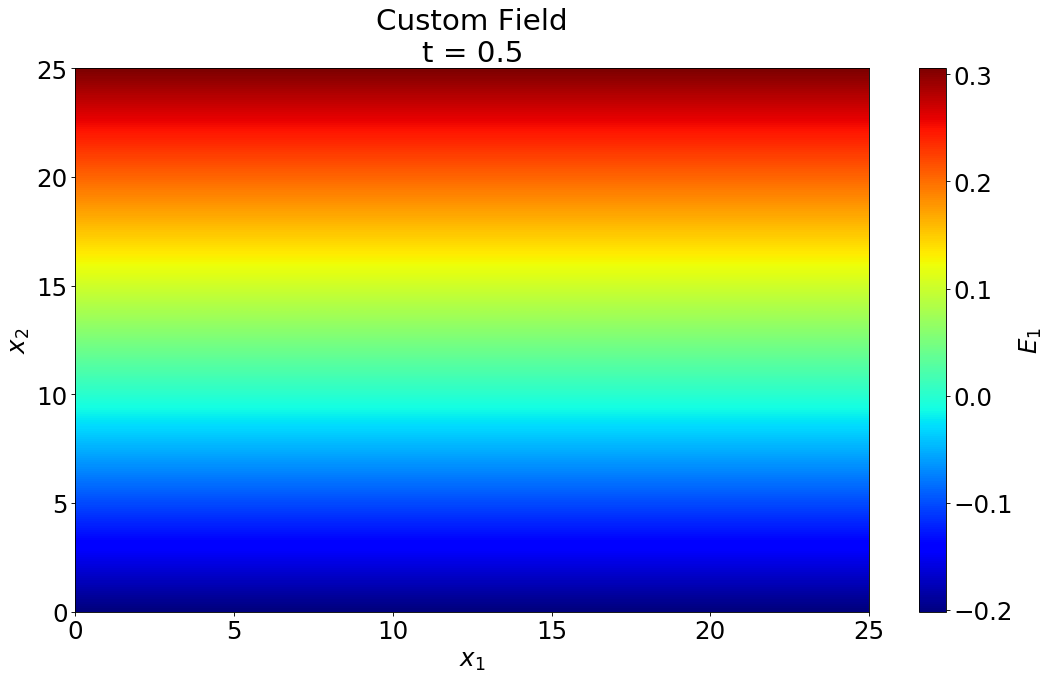

In [13]:
import matplotlib.pyplot as plt

range = [[0,sim.box[0]],[0,sim.box[1]]]
fig=plt.figure(figsize=(16, 9), dpi=80)
plt.rcParams.update({'font.size': 22})

plt.imshow( sim.emf.E_part[:,:,0], interpolation = 'bilinear', origin = 'lower',
          extent = ( range[0][0], range[0][1], range[1][0], range[1][1] ),
          aspect = 'auto', cmap = 'jet')

plt.colorbar().set_label('$E_1$')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Custom Field\nt = {:g}".format(sim.t))

plt.show()
fig.savefig("cstm.pdf")

In [8]:
sim.emf.E_part[:,:,0]

array([[-0.2002, -0.1998, -0.1994, ...,  0.    ,  0.    ,  0.    ],
       [-0.2002, -0.1998, -0.1994, ...,  0.    ,  0.    ,  0.    ],
       [-0.2002, -0.1998, -0.1994, ...,  0.    ,  0.    ,  0.    ],
       ...,
       [-0.2002, -0.1998, -0.1994, ...,  0.    ,  0.    ,  0.    ],
       [-0.2002, -0.1998, -0.1994, ...,  0.    ,  0.    ,  0.    ],
       [-0.2002, -0.1998, -0.1994, ...,  0.    ,  0.    ,  0.    ]],
      dtype=float32)

## Longitudinal Electric field and Plasma Density

In [14]:
#sim.emf.Ey[5]=0.1
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(16, 9), dpi=80)
plt.rcParams.update({'font.size': 22})

# Plot values at the center of the cells
xmin = sim.emf.dx/2
xmax = sim.emf.box - sim.emf.dx/2

ax1=plt.gca()
ax1.plot(numpy.linspace(xmin, xmax, num = sim.nx), ext_E(numpy.linspace(xmin, xmax, num = sim.nx))[0], label = r"$E_2=\alpha(x-\beta)$" )
ax1.set_xlabel("x1")
ax1.set_ylabel("E1")
plt.grid(True)
ax2=ax1.twinx()
ax2 = plt.gca()
ax2.plot(numpy.linspace(xmin, xmax, num = sim.nx), numpy.abs(electrons.charge()),'r', label = "$|n|$" , lw=3,alpha = 0.8)
ax2.set_ylabel("|$n$|")
ax1.set_ylim(-0.2,0.2)
ax2.set_xlim(5,15)

plt.title(r"$t=44=2\pi\sqrt{m/q\alpha}\;[1/\omega_p]$")


fig.legend(loc = (0.65,0.80))
#fig.tight_layout()

plt.show()
#fig.savefig("t44.pdf",bbox_inches="tight")


TypeError: unsupported operand type(s) for /: 'list' and 'int'

<Figure size 1920x1080 with 0 Axes>

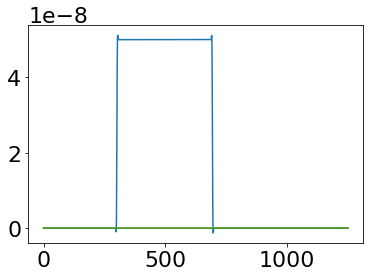

In [10]:
plt.plot(sim.emf.E_buf)

## x1 - u1 Phasespace

In [ ]:
import matplotlib.pyplot as plt

# Simple function to convert particle positions
x = lambda s : (s.particles['ix'] + s.particles['x']) * s.dx 

plt.plot(x(electrons),  electrons.particles['ux']*511e3/1e6,  '.', ms = 0.2)
plt.xlabel("x1")
plt.ylabel("u1")
plt.title("u1-x1 phasespace\nt = {:g}".format(sim.t))
plt.grid(True)
plt.show()

